# Multiple Layer LSTM

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)

2.2.0-rc3


In [0]:
# Get the data
vocab_size=8000
maxLen=250
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz", num_words=vocab_size,
skip_top=0, maxlen=maxLen, seed=113, start_char=1, oov_char=2, index_from=3)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxLen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxLen)

In [0]:
print('Review')
print(x_train[6])
print('Label')
print(y_train[6])

word2id = tf.keras.datasets.imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('Review with words')
print([id2word.get(i,' ') for i in x_train[6]])
print('Label')
print(y_train[6])

Review
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1   43  188   46    5  566  264   51    6  530  664
   14    9 1713   81   25 1135   46    7    6   20  750   11  141 4299
    5    2 4441  102   28  413   38  120 5533   15    4 3974    7 5369
  142  371  318    5  955 1713  571    2    2  122   14    8   72   54
   12   86  385   46    5   14   20    9  399    8   72  150   13  161
  124    6  155   44   14  159  170   83   12    5   51    6  866   48
   25  842    4 1120   25  238   79    4  547   15   14    9   31    7
  148    2  102   44   35  480 3823 2380   19  120    4  350  228    5
  269    8   28  178 1314 2347    7   51    6   87   65   12    9  979
   21   95   24 3186  178   11    2   14    9   24   15   20    4   84
  376    4   65   14  127  141    6   52  292    7 4751  175  561    7
   68 3866  137   75 2541   68  182    5  235  175  333   19   98   50
    9   38   76  724    4 6750   15  166  285   36  140  143   38   76

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128,input_length=maxLen),
    # tf.keras.layers.LSTM(64, return_sequences=True),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 250, 128)          1024000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 250, 64)           41216     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                1300      
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 1,066,537
Trainable params: 1,066,537
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001), metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 5
history = model.fit(x_train,y_train, epochs=NUM_EPOCHS, validation_data=(x_test,y_test),batch_size=128)

Epoch 1/5
196/196 [==============================] - 10s 52ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.5729 - val_accuracy: 0.8794
Epoch 2/5
196/196 [==============================] - 10s 53ms/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.6018 - val_accuracy: 0.8733
Epoch 3/5
196/196 [==============================] - 10s 54ms/step - loss: 0.0118 - accuracy: 0.9974 - val_loss: 0.6754 - val_accuracy: 0.8761
Epoch 4/5
196/196 [==============================] - 10s 53ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.5872 - val_accuracy: 0.8748
Epoch 5/5
196/196 [==============================] - 10s 52ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.5989 - val_accuracy: 0.8798


In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

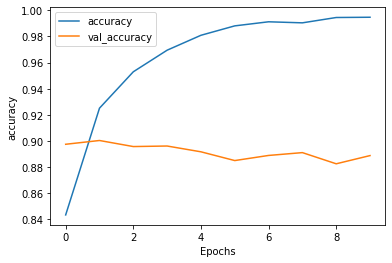

In [0]:
plot_graphs(history, 'accuracy')

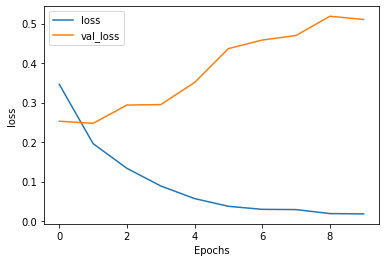

In [0]:
plot_graphs(history, 'loss')